<a href="https://colab.research.google.com/github/CristianS1988/ENSAYOGIT/blob/main/ProyectoFinalStatisticalLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final


### Acerca del Dataset
Los últimos años han sido testigos de grandes avances en la interpretación de imágenes de teledetección (RS) y sus amplias aplicaciones. Dado que las imágenes RS son cada vez más accesibles que nunca, existe una demanda creciente de interpretación automática de estas imágenes. En este contexto, los conjuntos de datos de referencia sirven como requisitos previos esenciales para desarrollar y probar algoritmos de interpretación inteligentes. Después de revisar los conjuntos de datos de referencia existentes en la comunidad de investigación de interpretación de imágenes RS, este artículo analiza el problema de cómo preparar de manera eficiente un conjunto de datos de referencia adecuado para la interpretación de imágenes RS. Específicamente, primero analizamos los desafíos actuales del desarrollo de algoritmos inteligentes para la interpretación de imágenes RS con investigaciones bibliométricas. Luego presentamos la orientación general sobre la creación de conjuntos de datos de referencia de manera eficiente. Siguiendo la guía presentada, también proporcionamos un ejemplo sobre la creación de un conjunto de datos de imágenes RS, es decir, Million-AID, un nuevo conjunto de datos de referencia a gran escala que contiene un millón de instancias para la clasificación de escenas de imágenes RS. Finalmente se analizan varios desafíos y perspectivas en la anotación de imágenes RS para facilitar la investigación en la construcción de conjuntos de datos de referencia. Esperamos que este documento brinde a la comunidad RS una perspectiva general sobre la construcción de conjuntos de datos de imágenes prácticos y a gran escala para futuras investigaciones, especialmente aquellas basadas en datos.

# Cargar archivos desde tu PC a Google Colab

In [17]:
from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


# Descomprimir archivos (si es necesario):

In [19]:
import zipfile

with zipfile.ZipFile('archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall('Data')


# Verificar el contenido

In [20]:
import os

# Listar el contenido de la carpeta DLfinal
directories = os.listdir('Data')
print(directories)


['data']


# Visualizar algunas imágenes

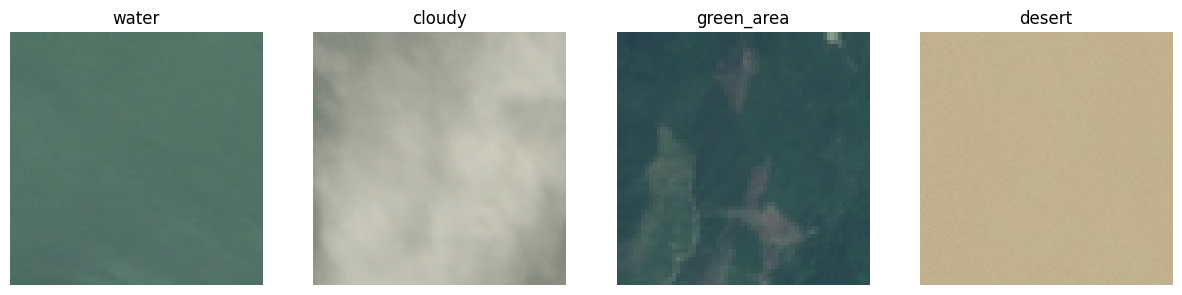

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

categories = ["water", "cloudy", "green_area", "desert"]
base_path = 'Data/data/'

# Función para mostrar imágenes
def show_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Cargar y mostrar una imagen de cada categoría
sample_images = []
sample_titles = []

for category in categories:
    # Obtener la lista de imágenes en la categoría
    image_files = os.listdir(os.path.join(base_path, category))

    # Cargar la primera imagen de la categoría como muestra
    img_path = os.path.join(base_path, category, image_files[0])
    img = Image.open(img_path)

    sample_images.append(img)
    sample_titles.append(category)

show_images(sample_images, sample_titles)


# Preparación de los datos

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img

# Variables
image_size = (150, 150)  # Tamaño al que redimensionaremos las imágenes
data = []
labels = []

# Cargar y preprocesar las imágenes
for category in categories:
    for image_file in os.listdir(os.path.join(base_path, category)):
        img_path = os.path.join(base_path, category, image_file)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(category)

# Convertir listas a arrays
data = np.array(data, dtype="float32") / 255.0  # Normalizar
labels = np.array(labels)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


# Revisar la distribución de las imágenes por categoría

In [24]:
# Contar cuántas imágenes hay en cada categoría
category_counts = {category: len(os.listdir(os.path.join(base_path, category))) for category in categories}

print(category_counts)


{'water': 1500, 'cloudy': 1500, 'green_area': 1500, 'desert': 1131}


# Construcción del modelo

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Dropout

# Construcción del modelo ajustado
model_adjusted = Sequential()

model_adjusted.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_adjusted.add(MaxPooling2D((2, 2)))
model_adjusted.add(Dropout(0.25))

model_adjusted.add(Conv2D(64, (3, 3), activation='relu'))
model_adjusted.add(MaxPooling2D((2, 2)))
model_adjusted.add(Dropout(0.25))

model_adjusted.add(Conv2D(128, (3, 3), activation='relu'))
model_adjusted.add(MaxPooling2D((2, 2)))
model_adjusted.add(Dropout(0.25))

model_adjusted.add(Flatten())
model_adjusted.add(Dense(512, activation='relu'))
model_adjusted.add(Dropout(0.5))
model_adjusted.add(Dense(4, activation='softmax'))  # 4 categorías

model_adjusted.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#Preparación de los datos

In [27]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Convertir etiquetas categóricas a numéricas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Codificación one-hot
y_train_onehot = to_categorical(y_train_encoded, num_classes=4)
y_test_onehot = to_categorical(y_test_encoded, num_classes=4)


#Entrenamiento del modelo:

In [28]:
# Entrenar el modelo
history = model_adjusted.fit(X_train, y_train_onehot, epochs=25, batch_size=32, validation_data=(X_test, y_test_onehot))


Epoch 1/25
141/141 [==============================] - 270s 2s/step - loss: 0.8356 - accuracy: 0.6217 - val_loss: 0.5899 - val_accuracy: 0.7418
Epoch 2/25
141/141 [==============================] - 264s 2s/step - loss: 0.4302 - accuracy: 0.8173 - val_loss: 0.5671 - val_accuracy: 0.7445
Epoch 3/25
141/141 [==============================] - 269s 2s/step - loss: 0.3735 - accuracy: 0.8501 - val_loss: 0.5173 - val_accuracy: 0.7560
Epoch 4/25
141/141 [==============================] - 265s 2s/step - loss: 0.3688 - accuracy: 0.8541 - val_loss: 0.5203 - val_accuracy: 0.8137
Epoch 5/25
141/141 [==============================] - 269s 2s/step - loss: 0.3740 - accuracy: 0.8459 - val_loss: 0.4946 - val_accuracy: 0.8243
Epoch 6/25
141/141 [==============================] - 264s 2s/step - loss: 0.3153 - accuracy: 0.8703 - val_loss: 0.6904 - val_accuracy: 0.7019
Epoch 7/25
141/141 [==============================] - 264s 2s/step - loss: 0.3186 - accuracy: 0.8734 - val_loss: 0.6544 - val_accuracy: 0.7604

# Evaluación del Modelo

In [29]:
test_loss, test_accuracy = model_adjusted.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


36/36 [==============================] - 16s 440ms/step - loss: 0.5724 - accuracy: 0.8101
Test Accuracy: 81.01%


In [30]:
test_loss, test_accuracy = model_adjusted.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


36/36 [==============================] - 15s 415ms/step - loss: 0.5724 - accuracy: 0.8101
Test Accuracy: 81.01%


# Visualización del Entrenamiento

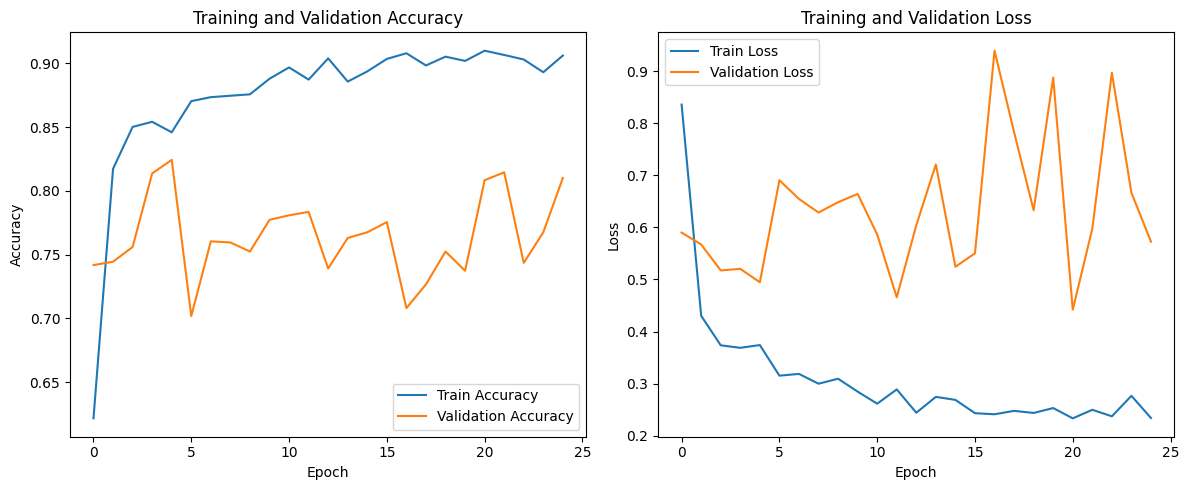

In [31]:
import matplotlib.pyplot as plt

# Precisión durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
predictions = model_adjusted.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)


36/36 [==============================] - 15s 414ms/step


# Matriz de Confusión

In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las predicciones del modelo
predictions = model_adjusted.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_onehot, axis=1)

# Crear la matriz de confusión


36/36 [==============================] - 15s 410ms/step


#Matriz de Confusión

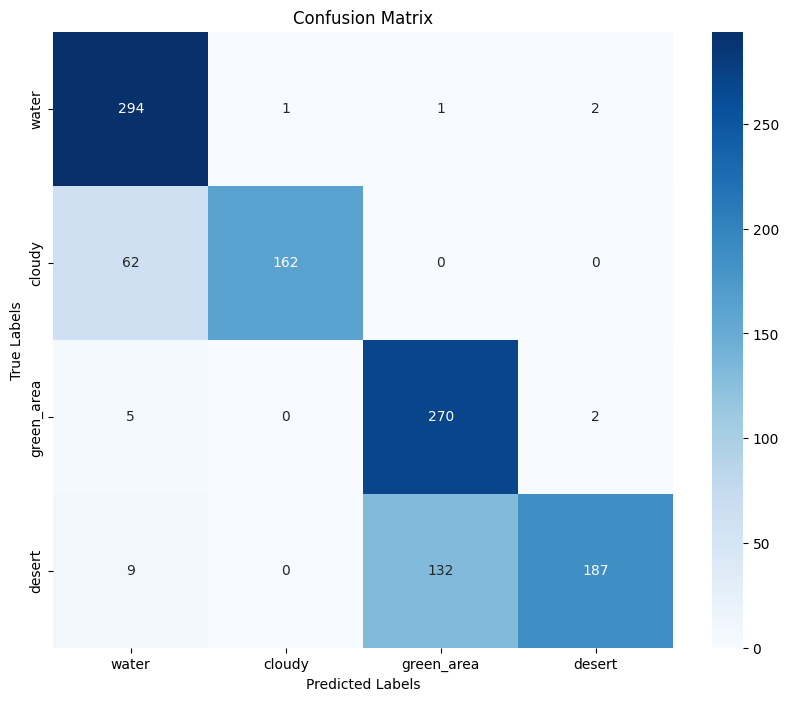

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Como ya obtuviste las predicciones anteriormente, continuamos con la matriz de confusión
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=["water", "cloudy", "green_area", "desert"],
            yticklabels=["water", "cloudy", "green_area", "desert"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#Mosaico

In [37]:
model_adjusted.save('mi_modelo.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 230ms/step


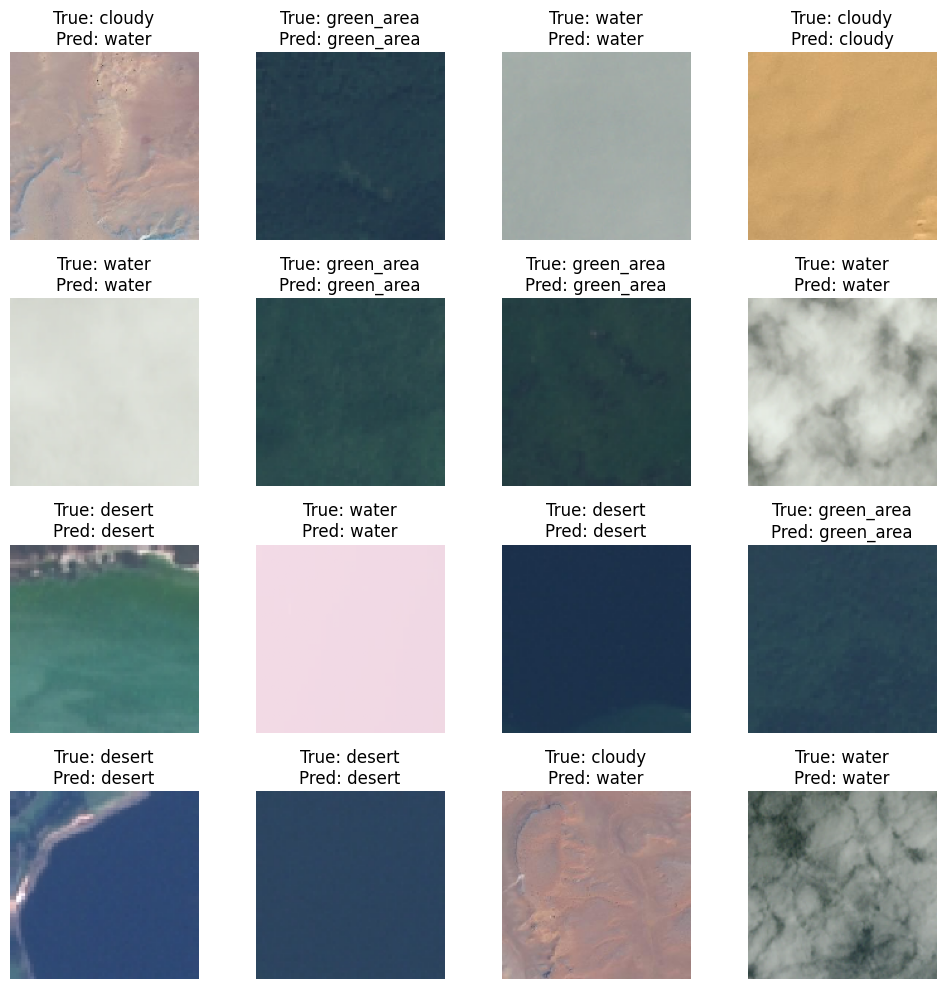

In [38]:
import matplotlib.pyplot as plt

# Obtener algunas imágenes de prueba y sus etiquetas verdaderas
num_images = 16  # Número de imágenes que quieres mostrar
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)
sample_images = X_test[random_indices]
sample_labels = y_test_onehot[random_indices]

# Predecir las clases con el modelo
sample_predictions = model_adjusted.predict(sample_images)
predicted_classes = np.argmax(sample_predictions, axis=1)
true_classes = np.argmax(sample_labels, axis=1)

# Mapear números a nombres de clases
class_names = ["water", "cloudy", "green_area", "desert"]

# Visualizar el mosaico
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(4, 4, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


1. ¿Por qué usaron ese data set?

Se eligió este dataset porque contiene imágenes relacionadas con la interpretación de imágenes de teledetección (RS), un área que ha experimentado un gran progreso en los últimos años. Las categorías "water", "cloudy", "green_area", y "desert" son representativas de escenas comunes en imágenes de teledetección y ofrecen un buen desafío para la clasificación automática.

2. ¿Qué retos encontraron con el data set?

Uno de los principales retos fue el límite de Google Drive para subir carpetas con un gran número de imágenes. Además, el dataset no estaba equilibrado, ya que la categoría "desert" tenía menos imágenes que las otras categorías.

3. ¿Cuántos filtros usaron y por qué los usaron?

Se utilizaron filtros de tamaño 32, 64 y 128 en las capas convolucionales. Estos filtros se usaron para extraer características de las imágenes en diferentes niveles de detalle. Comenzar con un número menor de filtros y aumentar gradualmente permite al modelo aprender desde características simples hasta características más complejas.

4. ¿Cuántos filtros de convolución utilizaron y porque los utilizaron?

Se utilizaron tres capas de convolución. Estas capas son esenciales para procesar imágenes, ya que pueden detectar patrones locales en diferentes partes de la imagen, como bordes, texturas y formas.

5. ¿Cuál es la estructura de la red neuronal?

La red neuronal comienza con tres capas convolucionales, seguidas de capas de pooling para reducir la dimensionalidad. Después de las capas convolucionales, se aplana la salida y se pasa por dos capas densas. La última capa tiene 4 neuronas, una para cada categoría, y utiliza una función de activación softmax para la clasificación.

6. Explicar la cantidad de capas y ¿Por qué usaron esas capas?

Se usaron tres capas convolucionales para extraer características de las imágenes en diferentes niveles. Las capas de pooling se usaron para reducir la dimensionalidad y evitar el sobreajuste. Las capas densas al final se utilizan para la clasificación. Esta estructura es común en modelos de clasificación de imágenes y ha demostrado ser efectiva en múltiples tareas.

7. ¿Cuáles fueron las funciones de activación para el proyecto?

Se utilizó la función de activación ReLU (Rectified Linear Unit) en las capas convolucionales y densas debido a su eficiencia y capacidad para evitar problemas como el desvanecimiento del gradiente. Para la última capa, se utilizó la función de activación softmax para obtener una distribución de probabilidad sobre las categorías.